In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from govuk_bank_holidays.bank_holidays import BankHolidays


c:\Users\izzfa\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ignore

In [238]:
bank_holidays = BankHolidays()
# for bank_holiday in bank_holidays.get_holidays():
    # print(bank_holiday['title'], 'is on', bank_holiday['date'])
# print(bank_holidays.get_next_holiday())

# see govuk_bank_holidays/bank_holidays.py source file for more methods and argument details…

# choose a different locale for holiday titles and notes
bank_holidays = BankHolidays(locale='cy')

# use cached holidays if internet connection is not desired
bank_holidays = BankHolidays(use_cached_holidays=True)
# bank_holidays

In [232]:
fp_weath = r"C:\Users\izzfa\Documents\Data Science\Year 2\Y2Q4\DC2\Data\london_weather.csv"
weather = pd.read_csv(fp_weath)
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')

# Set 'Date' column as the index
weather.set_index('date', inplace=True)

# Resample to monthly frequency and calculate the mean
weather = weather.resample('M', loffset='MS').mean()

# Print the monthly averages
newdf = weather.reset_index()
newdf = newdf[newdf['date']>='2010-12-01']
newdf = newdf[['date', 'mean_temp', 'precipitation']]
# newdf

C:\Users\izzfa\AppData\Local\Temp\ipykernel_16292\3696865146.py:9: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weather = weather.resample('M', loffset='MS').mean()


In [233]:
# Generate date range for the first day of every month
start_date = '2021-01-01'
end_date = '2023-03-01'
daterange = pd.date_range(start=start_date, end=end_date, freq='MS')
date = pd.DataFrame({'date':daterange})
# Concatenate the existing dataframe and the new dataframe
extended_df = pd.concat([newdf, date], ignore_index=True)

# Set 'Date' column as the index
extended_df.set_index('date', inplace=True)

# Linear interpolation to impute missing values or extend existing data
df_interpolated = extended_df.interpolate(method='linear')

# Reset index to restore the 'Date' column
df_interpolated.reset_index(inplace=True)

# Print the imputed dataframe
# df_interpolated

# Loading Data

In [3]:
filepath_barn = "../../Data/ward_data.parquet"

barnet = pq.read_pandas(filepath_barn).to_pandas()
# Remove commas and convert to integers
barnet['Mid-2020 population'] = barnet['Mid-2020 population'].str.replace(',', '').astype(int)
barnet['People per Sq Km'] = barnet['People per Sq Km'].str.replace(',', '').astype(int)

burglary_counts = barnet.groupby(['Month', 'WD22NM'])['Crime type'].count().reset_index()
burglary_counts.rename(columns={'Crime type': 'Burglaries'}, inplace=True)
barnet = barnet.merge(burglary_counts, on=['Month','WD22NM'], how='left')

barnet['Month'] = pd.to_datetime(barnet['Month'])
barnet = barnet.sort_values('Month')
barnet

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,LSOA21NM,WD22NM,LSOA Code,Mid-2020 population,Area Sq Km,People per Sq Km,Burglaries
25504,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.164205,51.613222,On or near Lewes Road,E01000324,Barnet 015F,Burglary,None,NaN,Barnet 015F,Woodhouse,E01000324,1851,0.27,6820,10
31048,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.157661,51.652137,On or near Langford Road,E01000166,Barnet 003A,Burglary,None,NaN,Barnet 003A,East Barnet,E01000166,1619,0.37,4379,16
8551,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.186585,51.604371,On or near Willow Way,E01000298,Barnet 023D,Burglary,None,NaN,Barnet 023D,West Finchley,E01000298,2007,0.27,7545,27
19476,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.213734,51.567559,On or near Cotswold Gardens,E01000222,Barnet 040C,Burglary,None,NaN,Barnet 040C,Cricklewood,E01000222,1975,0.42,4748,11
19477,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.214454,51.570906,On or near Prayle Grove,E01000222,Barnet 040C,Burglary,None,NaN,Barnet 040C,Cricklewood,E01000222,1975,0.42,4748,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,5edebc29e8ee6a316ce91e3dc7de4cacafe6901d6a1045...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.188374,51.574652,On or near Corringham Road,E01000214,Barnet 038E,Burglary,Under investigation,NaN,Barnet 038E,Childs Hill,E01000214,1909,0.33,5762,20
18013,b6106017b050bf4b1f4d17100c391c6fcd626985049973...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.215314,51.557290,On or near,E01000141,Barnet 039A,Burglary,Under investigation,NaN,Barnet 039A,Cricklewood,E01000141,2258,0.37,6094,9
18014,2ab650a481ac9e02643ee99659a846237f2d25006aab8e...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.216684,51.559259,On or near Kara Way,E01000141,Barnet 039A,Burglary,Under investigation,NaN,Barnet 039A,Cricklewood,E01000141,2258,0.37,6094,9
38649,e52bf021cbf673d1a3742f2ffc7033f164958ebdf5ad25...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.205638,51.652907,On or near Coe'S Alley,E01000250,Barnet 001C,Burglary,Under investigation,NaN,Barnet 001C,High Barnet,E01000250,2793,0.58,4803,6


# Processing Data

In [206]:
allW = barnet[['Month', 'WD22NM', 'Burglaries']]
allW = allW.drop_duplicates()

# Group the data by ward and aggregate the number of burglaries
allW = allW.groupby(['Month', 'WD22NM']).sum().reset_index()

# Create a new dataframe with the dates and aggregated number of burglaries per ward
ward_data = allW.pivot(index='Month', columns='WD22NM', values='Burglaries')
ward_data = ward_data.reset_index()


# Rename columns to match Prophet's requirements
ward_data.rename(columns={'Month': 'ds'}, inplace=True)
wd2 = ward_data.copy()
# Create a column for the total number of burglaries across all wards
wd2['y'] = wd2.drop('ds', axis=1).sum(axis=1)

# Set 'Date' column as the index
ward_data.set_index('ds', inplace=True)

# Linear interpolation to impute missing values or extend existing data
df_interpolated = ward_data.interpolate(method='linear')

# Reset index to restore the 'Date' column
df_interpolated.reset_index(inplace=True)

# Print the imputed dataframe
# df_interpolated
wd2

WD22NM,ds,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,...,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse,y
0,2010-12-01,13.0,13.0,10.0,20.0,7.0,11.0,16.0,18.0,20.0,...,33.0,14.0,25.0,10.0,8.0,27.0,16.0,9.0,10.0,363.0
1,2011-01-01,23.0,15.0,14.0,41.0,5.0,13.0,20.0,19.0,12.0,...,29.0,21.0,30.0,17.0,15.0,30.0,19.0,14.0,21.0,476.0
2,2011-02-01,20.0,22.0,10.0,24.0,5.0,20.0,12.0,13.0,13.0,...,24.0,15.0,18.0,13.0,5.0,23.0,22.0,15.0,17.0,395.0
3,2011-03-01,15.0,13.0,6.0,33.0,8.0,25.0,13.0,14.0,4.0,...,39.0,17.0,23.0,8.0,22.0,22.0,12.0,17.0,6.0,399.0
4,2011-04-01,25.0,15.0,16.0,37.0,6.0,28.0,15.0,8.0,9.0,...,33.0,18.0,15.0,16.0,18.0,23.0,15.0,17.0,11.0,403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2022-11-01,5.0,4.0,11.0,32.0,5.0,15.0,5.0,3.0,8.0,...,18.0,10.0,7.0,13.0,5.0,16.0,11.0,11.0,15.0,234.0
144,2022-12-01,9.0,5.0,13.0,21.0,6.0,13.0,11.0,6.0,10.0,...,12.0,NaN,13.0,15.0,3.0,9.0,9.0,10.0,7.0,211.0
145,2023-01-01,5.0,7.0,11.0,21.0,5.0,13.0,9.0,5.0,10.0,...,15.0,9.0,10.0,15.0,5.0,17.0,11.0,NaN,4.0,223.0
146,2023-02-01,2.0,14.0,4.0,21.0,3.0,15.0,5.0,5.0,11.0,...,11.0,7.0,12.0,12.0,2.0,5.0,10.0,3.0,6.0,184.0


# Ignore

In [192]:
#IGNORE

UK_bankhols = pd.DataFrame()
# UK_bankhols['Month'] = ['2010-01', '2010-04', '2010-04', '2010-05', '2010-05', '2010-08', '2010-12', '2010-12']
# UK_bankhols['Holiday'] = ['New Year\'s', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 
                        #   'Spring bank holiday', 'Summer bank holiday', 'Christmas Day', 'Boxing Day']
# UK_bankhols['Month'] = pd.to_datetime(UK_bankhols['Month'])

# Set of dates to replicate per year
dates_to_replicate = pd.to_datetime(['2010-01', '2010-04', '2010-04', '2010-05', '2010-05', '2010-08', '2010-12', '2010-12'])

# Number of years to add to each date
num_years = 5

# Replicate the dates per year
replicated_dates = []
for date in dates_to_replicate:
    replicated_dates.extend(pd.date_range(date, periods=num_years, freq='AS'))

# Print the replicated dates
UK_bankhols['Month'] = replicated_dates
# UK_bankhols


# Model for all of barnet burglaries

In [220]:
m2 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model2 = m2.fit(wd2)

15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] done processing


In [225]:
# Make predictions for each ward
future = m2.make_future_dataframe(periods=2, freq='M')
forecast = m2.predict(future)
# ward_forecast = forecast[['ds'] + [col for col in forecast.columns if col.startswith('yhat')]]
ward_forecast = forecast[[col for col in forecast.columns]]

ward_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,397.320969,343.733404,490.435273,397.320969,397.320969,21.875605,21.875605,21.875605,21.875605,21.875605,21.875605,0.0,0.0,0.0,419.196574
1,2011-01-01,395.743513,356.758171,504.072589,395.743513,395.743513,34.637231,34.637231,34.637231,34.637231,34.637231,34.637231,0.0,0.0,0.0,430.380744
2,2011-02-01,394.166057,326.596240,472.646983,394.166057,394.166057,4.452663,4.452663,4.452663,4.452663,4.452663,4.452663,0.0,0.0,0.0,398.618721
3,2011-03-01,392.741259,320.834729,467.651707,392.741259,392.741259,1.943289,1.943289,1.943289,1.943289,1.943289,1.943289,0.0,0.0,0.0,394.684548
4,2011-04-01,391.163803,304.417531,447.275553,391.163803,391.163803,-20.184063,-20.184063,-20.184063,-20.184063,-20.184063,-20.184063,0.0,0.0,0.0,370.979740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-01-01,186.081778,152.397941,292.667882,186.081778,186.081778,34.637231,34.637231,34.637231,34.637231,34.637231,34.637231,0.0,0.0,0.0,220.719009
146,2023-02-01,184.612255,117.806662,264.420316,184.612255,184.612255,4.452663,4.452663,4.452663,4.452663,4.452663,4.452663,0.0,0.0,0.0,189.064919
147,2023-03-01,183.284945,116.432918,259.604008,183.284945,183.284945,1.943289,1.943289,1.943289,1.943289,1.943289,1.943289,0.0,0.0,0.0,185.228234
148,2023-03-31,181.862826,123.442517,272.547521,181.857964,181.867291,12.315855,12.315855,12.315855,12.315855,12.315855,12.315855,0.0,0.0,0.0,194.178681


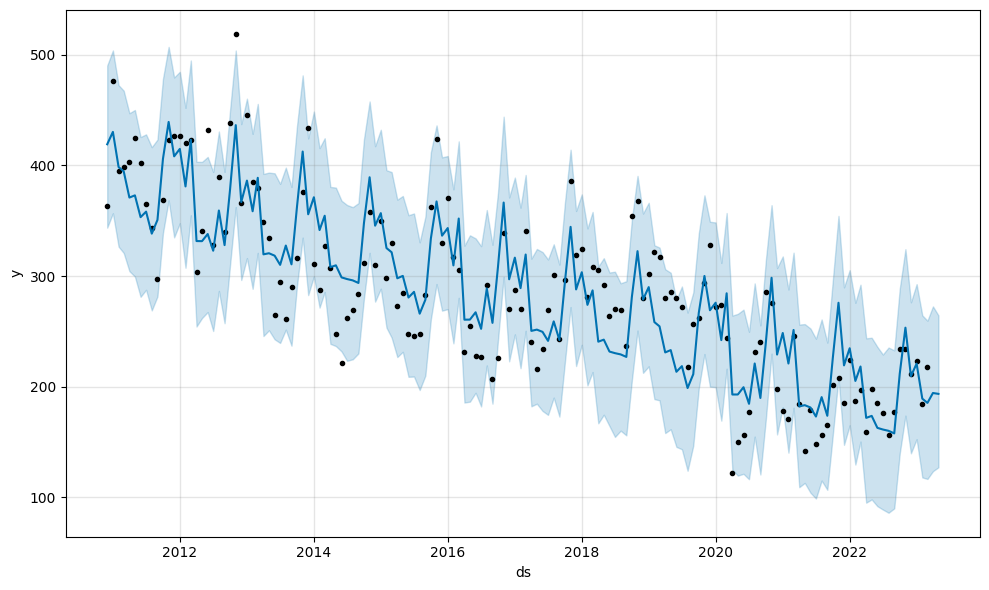

In [226]:
plot2 = m2.plot(ward_forecast)

In [227]:
pred = ward_forecast[ward_forecast['ds']<='2023-03-01']
# Calculate MSE
mse = mean_squared_error(wd2['y'], pred['yhat'])

# Calculate R2 score
r2 = r2_score(wd2['y'], pred['yhat'])
r2, mse

(0.7797927097505362, 1384.0336526619628)

# Model for per ward

In [209]:
# Initialize a dictionary to store the forecasts per ward
ward_forecasts = {}
# Iterate over each ward
for ward in df_interpolated.columns[1:]:
    # Create a new dataframe for the current ward
    ward_df = df_interpolated[['ds', ward]].rename(columns={ward: 'y'})
    m4 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.2, seasonality_prior_scale=7.0,)
    # m4.add_country_holidays(country_name='UK')
    m4.fit(ward_df)
    # Make future predictions for the current ward
    future = m4.make_future_dataframe(periods=2, freq='M')
    forecast = m4.predict(future)

    # Store the forecast for the current ward in the dictionary
    # ward_forecasts[ward] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    ward_forecasts[ward] = forecast



15:18:27 - cmdstanpy - INFO - Chain [1] start processing
15:18:27 - cmdstanpy - INFO - Chain [1] done processing
15:18:27 - cmdstanpy - INFO - Chain [1] start processing
15:18:27 - cmdstanpy - INFO - Chain [1] done processing
15:18:28 - cmdstanpy - INFO - Chain [1] start processing
15:18:28 - cmdstanpy - INFO - Chain [1] done processing
15:18:28 - cmdstanpy - INFO - Chain [1] start processing
15:18:28 - cmdstanpy - INFO - Chain [1] done processing
15:18:28 - cmdstanpy - INFO - Chain [1] start processing
15:18:28 - cmdstanpy - INFO - Chain [1] done processing
15:18:28 - cmdstanpy - INFO - Chain [1] start processing
15:18:28 - cmdstanpy - INFO - Chain [1] done processing
15:18:29 - cmdstanpy - INFO - Chain [1] start processing
15:18:29 - cmdstanpy - INFO - Chain [1] done processing
15:18:29 - cmdstanpy - INFO - Chain [1] start processing
15:18:29 - cmdstanpy - INFO - Chain [1] done processing
15:18:29 - cmdstanpy - INFO - Chain [1] start processing
15:18:29 - cmdstanpy - INFO - Chain [1]

In [230]:
# Access the forecast for a specific ward
specific_ward_forecast = ward_forecasts['Barnet Vale']
# Print the forecast for a specific ward
specific_ward_forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,19.587925,14.778839,33.186319,19.587925,19.587925,4.261620,4.261620,4.261620,4.261620,4.261620,4.261620,0.0,0.0,0.0,23.849545
1,2011-01-01,19.496808,11.755336,30.891441,19.496808,19.496808,1.488042,1.488042,1.488042,1.488042,1.488042,1.488042,0.0,0.0,0.0,20.984850
2,2011-02-01,19.405690,10.166526,28.550541,19.405690,19.405690,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,0.0,0.0,0.0,19.243610
3,2011-03-01,19.323390,10.264362,28.183351,19.323390,19.323390,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,0.0,0.0,0.0,18.861074
4,2011-04-01,19.232273,7.540650,26.186216,19.232273,19.232273,-2.307112,-2.307112,-2.307112,-2.307112,-2.307112,-2.307112,0.0,0.0,0.0,16.925161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-01-01,5.102938,-2.716331,15.427620,5.102938,5.102938,1.488042,1.488042,1.488042,1.488042,1.488042,1.488042,0.0,0.0,0.0,6.590980
146,2023-02-01,4.974195,-4.509719,14.262110,4.974195,4.974195,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,0.0,0.0,0.0,4.812116
147,2023-03-01,4.857912,-4.879067,13.985542,4.857912,4.857912,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,0.0,0.0,0.0,4.395595
148,2023-03-31,4.733322,-3.795816,15.107015,4.732415,4.733995,0.665736,0.665736,0.665736,0.665736,0.665736,0.665736,0.0,0.0,0.0,5.399058


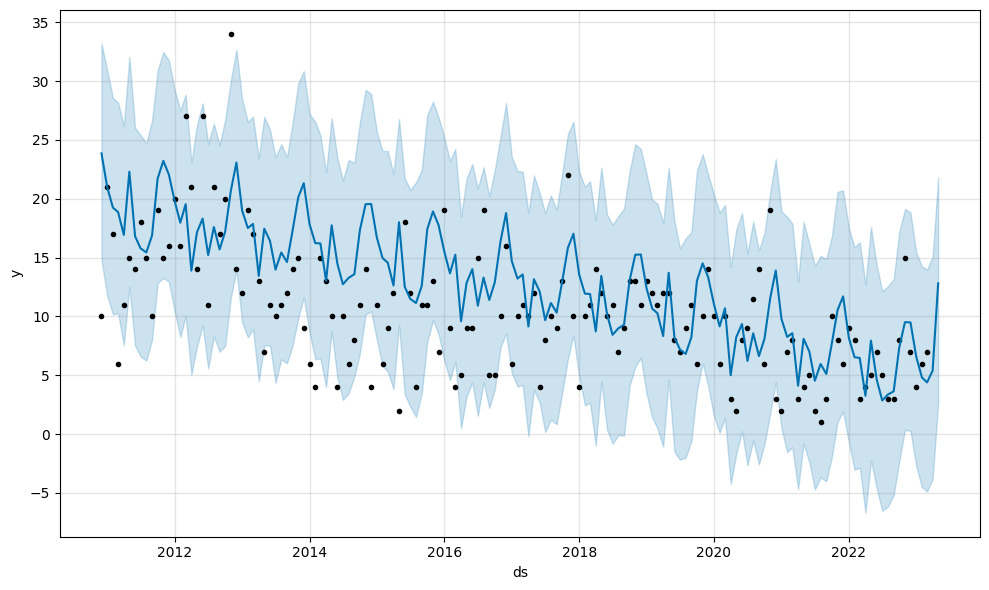

In [216]:
plot3 = m4.plot(specific_ward_forecast)

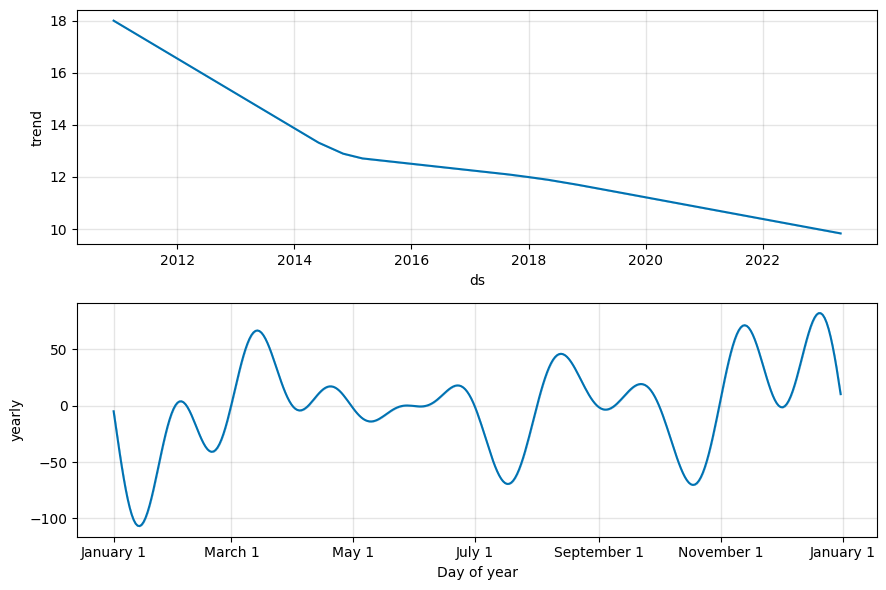

In [212]:
plot3 = m4.plot_components(specific_ward_forecast)

In [217]:
pred = specific_ward_forecast[specific_ward_forecast['ds']<='2023-03-01']
# Calculate MSE
mse = mean_squared_error(df_interpolated['Barnet Vale'], pred['yhat'])
mse

22.772056430701813

In [218]:
# Calculate R2 score
r2 = r2_score(df_interpolated['Barnet Vale'], pred['yhat'])
r2

0.5103259518295635

# Not Important 

In [14]:
oneWard = barnet[barnet['WD22NM'] == 'West Finchley'].copy()

oneWard = oneWard[['Month', 'Burglaries']]
Ward = oneWard.drop_duplicates()

Ward = Ward.rename(columns={'Month': 'ds', 'Burglaries':'y'})
Ward

,ds,y
8551,2010-12-01,27
26618,2011-01-01,30
34403,2011-02-01,23
34407,2011-03-01,22
39754,2011-04-01,23
...,...,...
41674,2022-11-01,16
26608,2022-12-01,9
33938,2023-01-01,17
33940,2023-02-01,5


In [21]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(Ward)
model

17:28:47 - cmdstanpy - INFO - Chain [1] start processing
17:28:47 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future_WF = m.make_future_dataframe(periods=12, freq='M')
forecast_WF = model.predict(future_WF)
forecast_WF.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
148,2023-03-31,8.291625,1.231404,20.829867,8.291551,8.291700,2.703144,2.703144,2.703144,2.703144,2.703144,2.703144,0.0,0.0,0.0,10.994769
149,2023-04-30,8.200500,-8.757016,10.454518,8.200237,8.200728,-7.199258,-7.199258,-7.199258,-7.199258,-7.199258,-7.199258,0.0,0.0,0.0,1.001242
150,2023-05-31,8.106336,-5.693746,14.690998,8.105851,8.106781,-3.556438,-3.556438,-3.556438,-3.556438,-3.556438,-3.556438,0.0,0.0,0.0,4.549898
151,2023-06-30,8.015211,-5.580149,14.272839,8.014416,8.015854,-3.355486,-3.355486,-3.355486,-3.355486,-3.355486,-3.355486,0.0,0.0,0.0,4.659724
152,2023-07-31,7.921047,7.916650,28.492243,7.919949,7.921934,10.306522,10.306522,10.306522,10.306522,10.306522,10.306522,0.0,0.0,0.0,18.227570
153,2023-08-31,7.826884,-19.017397,-0.539110,7.825371,7.828016,-17.949949,-17.949949,-17.949949,-17.949949,-17.949949,-17.949949,0.0,0.0,0.0,-10.123065
154,2023-09-30,7.735758,11.809024,32.164389,7.733898,7.737229,14.291543,14.291543,14.291543,14.291543,14.291543,14.291543,0.0,0.0,0.0,22.027302
155,2023-10-31,7.641595,6.384783,25.602029,7.639347,7.643467,8.337221,8.337221,8.337221,8.337221,8.337221,8.337221,0.0,0.0,0.0,15.978816
156,2023-11-30,7.550470,-4.176358,16.605376,7.547893,7.552689,-1.095773,-1.095773,-1.095773,-1.095773,-1.095773,-1.095773,0.0,0.0,0.0,6.454697
157,2023-12-31,7.456306,-4.852820,13.724034,7.453129,7.458904,-3.390047,-3.390047,-3.390047,-3.390047,-3.390047,-3.390047,0.0,0.0,0.0,4.066259


In [23]:
forecast_WF[['ds', 'yhat']]

,ds,yhat
0,2010-12-01,23.388984
1,2011-01-01,25.382559
2,2011-02-01,23.720186
3,2011-03-01,28.409897
4,2011-04-01,21.359951
...,...,...
155,2023-10-31,15.978816
156,2023-11-30,6.454697
157,2023-12-31,4.066259
158,2024-01-31,7.521916


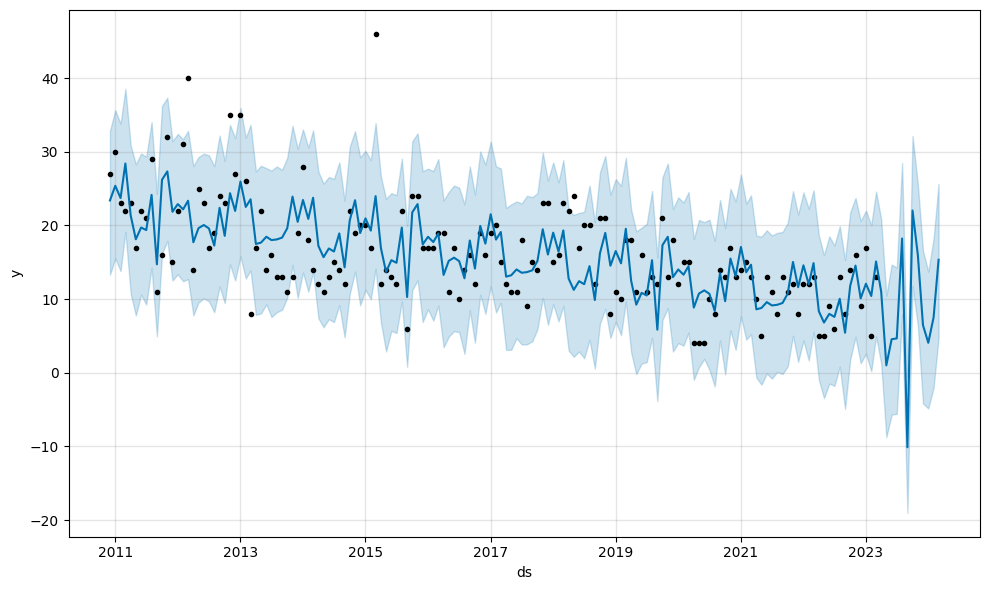

In [24]:
plot1 = m.plot(forecast_WF)